# **Case Study Assignment: Warehouse and Retail Sales Analysis**



### **Part 1: Data Preparation**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Warehouse_and_Retail_Sales.csv to Warehouse_and_Retail_Sales.csv


In [2]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Warehouse_and_Retail_Sales.csv']))
print(df)



        YEAR  MONTH                             SUPPLIER ITEM CODE  \
0       2020      1    REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1       2020      1                            PWSWN INC    100024   
2       2020      1              RELIABLE CHURCHILL LLLP      1001   
3       2020      1            LANTERNA DISTRIBUTORS INC    100145   
4       2020      1                 DIONYSOS IMPORTS INC    100293   
...      ...    ...                                  ...       ...   
307640  2020      9              BOSTON BEER CORPORATION     98868   
307641  2020      9  GLOBAL OCEAN AND AIR CARGO SERVICES     98884   
307642  2020      9                         HEINEKEN USA     98906   
307643  2020      9              RELIABLE CHURCHILL LLLP     98914   
307644  2020      9                CONSTANTINE WINES INC     98930   

                           ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                       BOOTLEG RED - 750ML      WINE          0.00   
1                

In [3]:
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


In [51]:
#Check Null Values
df.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,167
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,1
RETAIL SALES,3
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


In [5]:
print(df[df['SUPPLIER'].isnull()])

        YEAR  MONTH SUPPLIER ITEM CODE           ITEM DESCRIPTION  \
106     2020      1      NaN       107  JIGGER MEASURE SHOT GLASS   
188     2020      1      NaN       113     BARTENDERS BLACK  BOOK   
231     2020      1      NaN       115    PLASTIC SHOT GLASS PACK   
252     2020      1      NaN       117    WHISKEY TASTING JOURNAL   
261     2020      1      NaN       118    PLASTIC WINE GLASS PACK   
...      ...    ...      ...       ...                        ...   
296544  2020      9      NaN       119       BRUMATE WINE TUMBLER   
296601  2020      9      NaN       123      HOLIDAY TOTE FOIL BAG   
299492  2020      9      NaN         3                     COUPON   
302910  2020      9      NaN         4                   RMS ITEM   
307604  2020      9      NaN        WC                WINE CREDIT   

           ITEM TYPE  RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES  
106     STR_SUPPLIES         14.69              18.0              0.0  
188     STR_SUPPLIES       

In [6]:
print(df[df['ITEM TYPE'].isnull()])

       YEAR  MONTH                           SUPPLIER ITEM CODE  \
95725  2017     10  REPUBLIC NATIONAL DISTRIBUTING CO    347939   

                               ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
95725  FONTANAFREDDA BAROLO SILVER LABEL 750 ML       NaN           0.0   

       RETAIL TRANSFERS  WAREHOUSE SALES  
95725               0.0              1.0  


In [7]:
print(df[df['RETAIL SALES'].isnull()])

        YEAR  MONTH SUPPLIER ITEM CODE ITEM DESCRIPTION    ITEM TYPE  \
18390   2020      7      NaN         4         RMS ITEM  NON-ALCOHOL   
299492  2020      9      NaN         3           COUPON  NON-ALCOHOL   
302910  2020      9      NaN         4         RMS ITEM  NON-ALCOHOL   

        RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES  
18390            NaN               0.0              0.0  
299492           NaN               0.0              0.0  
302910           NaN               0.0              0.0  


In [8]:
print(df.dtypes)

YEAR                  int64
MONTH                 int64
SUPPLIER             object
ITEM CODE            object
ITEM DESCRIPTION     object
ITEM TYPE            object
RETAIL SALES        float64
RETAIL TRANSFERS    float64
WAREHOUSE SALES     float64
dtype: object


In [52]:
#Check Unique Values

print(df['SUPPLIER'].unique())
print(df['ITEM CODE'].unique())
print(df['ITEM DESCRIPTION'].unique())
print(df['ITEM TYPE'].unique())

['REPUBLIC NATIONAL DISTRIBUTING CO' 'PWSWN INC' 'RELIABLE CHURCHILL LLLP'
 'LANTERNA DISTRIBUTORS INC' 'DIONYSOS IMPORTS INC'
 'KYSELA PERE ET FILS LTD' 'SANTA MARGHERITA USA INC'
 'BROWN-FORMAN BEVERAGES WORLDWIDE' 'JIM BEAM BRANDS CO'
 'INTERNATIONAL CELLARS LLC' 'HEAVEN HILL DISTILLERIES INC'
 'BACCHUS IMPORTERS LTD' 'MONSIEUR TOUTON SELECTION'
 'THE COUNTRY VINTNER, LLC DBA WINEBOW' 'ROYAL WINE CORP'
 'STE MICHELLE WINE ESTATES' 'Default' 'SAZERAC CO' 'SALVETO IMPORTS LLC'
 'HUB WINE CORPORATION' 'ALLAGASH BREWING COMPANY' 'CAMPARI AMERICA LLC'
 'PERNOD RICARD USA LLC' 'PRESTIGE BEVERAGE GROUP OF MD LLC'
 'BACARDI USA INC' 'YOUNG WON TRADING INC' 'TROEGS BREWING COMPANY'
 'CASTLE BRANDS USA CORP' 'LEGENDS LTD' 'WASHBURN WINE CO'
 'CELICAR LLC DBA TWIN VALLEY DISTILLERS' 'DOPS INC'
 'JACKSON FAMILY ENTERPRISES INC' 'BUCK DISTRIBUTING COMPANY INC'
 'PUNTO VINO LLC' 'VICTORY BREWING COMPANY LLC' 'THE WINE GROUP'
 'ELITE WINES IMPORTS' 'LUNEAU USA INC' 'BARON FRANCOIS LTD'
 'PROXIMO S

In [10]:
df_cleaned = df.dropna(subset=['ITEM TYPE', 'RETAIL SALES'])
df_cleaned.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,164
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,0
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


In [11]:
df_cleaned['SUPPLIER'] = df['SUPPLIER'].fillna('UNKNOWN')

<ipython-input-11-0e820eddedb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['SUPPLIER'] = df['SUPPLIER'].fillna('UNKNOWN')


In [12]:
df_cleaned.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,0
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,0
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


In [13]:
# Check Duplicate Values

print(df_cleaned.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
307640    False
307641    False
307642    False
307643    False
307644    False
Length: 307641, dtype: bool


In [14]:
# Check Negative Values

column = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
negative_counts = {col: (df_cleaned[col] < 0).sum() for col in column}
print(negative_counts)

{'RETAIL SALES': 113, 'RETAIL TRANSFERS': 1016, 'WAREHOUSE SALES': 716}


In [ ]:
# Replace negative values with 0

column = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
for col in column:
    df_cleaned[col] = df_cleaned[col].where(df_cleaned[col] >= 0, 0)

In [16]:
# Count negative values in each column after replacing with 0

column = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
negative_counts = {col: (df_cleaned[col] < 0).sum() for col in column}
print(negative_counts)

{'RETAIL SALES': 0, 'RETAIL TRANSFERS': 0, 'WAREHOUSE SALES': 0}


In [17]:
print(df_cleaned)

        YEAR  MONTH                             SUPPLIER ITEM CODE  \
0       2020      1    REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1       2020      1                            PWSWN INC    100024   
2       2020      1              RELIABLE CHURCHILL LLLP      1001   
3       2020      1            LANTERNA DISTRIBUTORS INC    100145   
4       2020      1                 DIONYSOS IMPORTS INC    100293   
...      ...    ...                                  ...       ...   
307640  2020      9              BOSTON BEER CORPORATION     98868   
307641  2020      9  GLOBAL OCEAN AND AIR CARGO SERVICES     98884   
307642  2020      9                         HEINEKEN USA     98906   
307643  2020      9              RELIABLE CHURCHILL LLLP     98914   
307644  2020      9                CONSTANTINE WINES INC     98930   

                           ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                       BOOTLEG RED - 750ML      WINE          0.00   
1                

Cleaned the dataset by first loading and exploring it to identify missing values and data inconsistencies. Addressed missing values by removing rows with missing ITEM TYPE or RETAIL SALES (4 values in total) and replaced missing SUPPLIER entries with 'UNKNOWN'(164 Values). Negative values in RETAIL SALES, RETAIL TRANSFERS, and WAREHOUSE SALES columns were corrected to 0 . Duplicate records were also eliminated.

### **Part 2: Exploratory Data Analysis**

In [31]:
# Calculate total sales by adding RETAIL SALES and WAREHOUSE SALES year wise


total_sales_per_year = df_cleaned.groupby('YEAR')[['RETAIL SALES', 'WAREHOUSE SALES']].sum()

total_sales_per_year['TOTAL SALES'] = total_sales_per_year['RETAIL SALES'] + total_sales_per_year['WAREHOUSE SALES']

print(total_sales_per_year)


      RETAIL SALES  WAREHOUSE SALES  TOTAL SALES
YEAR                                            
2017     686760.02       2382157.17   3068917.19
2018     153598.36        530177.51    683775.87
2019     960205.14       3613686.57   4573891.71
2020     360379.22       1399486.62   1759865.84


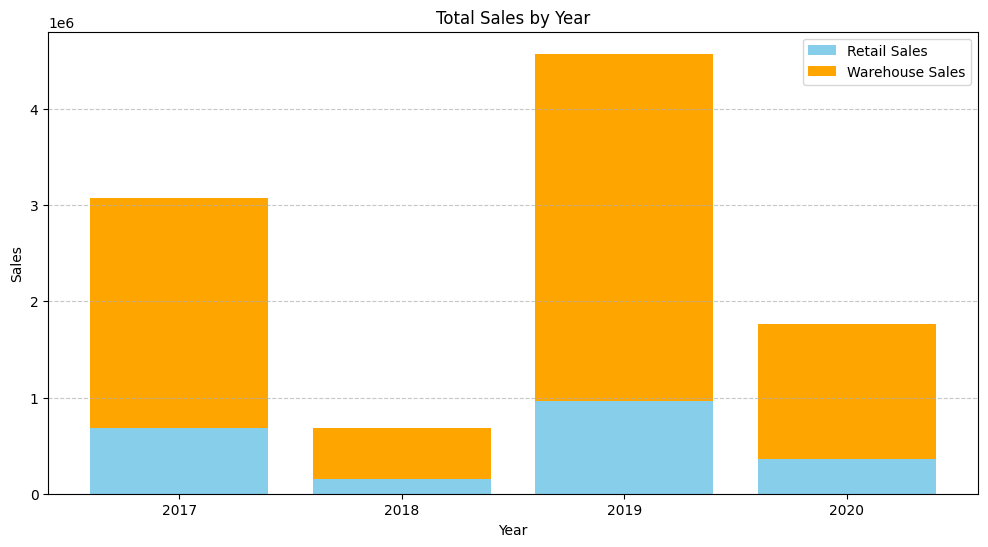

In [36]:
# Visualzie total sales by adding RETAIL SALES and WAREHOUSE SALES year wise in Lakhs


import matplotlib.pyplot as plt

total_sales_per_year = df_cleaned.groupby('YEAR')[['RETAIL SALES', 'WAREHOUSE SALES']].sum()
total_sales_per_year['TOTAL SALES'] = total_sales_per_year['RETAIL SALES'] + total_sales_per_year['WAREHOUSE SALES']

total_sales_per_year = total_sales_per_year.reset_index()

plt.figure(figsize=(12, 6))

plt.bar(total_sales_per_year['YEAR'], total_sales_per_year['RETAIL SALES'], label='Retail Sales', color='skyblue')
plt.bar(total_sales_per_year['YEAR'], total_sales_per_year['WAREHOUSE SALES'], bottom=total_sales_per_year['RETAIL SALES'], label='Warehouse Sales', color='orange')

plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(total_sales_per_year['YEAR'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [37]:
# Top 5 suppliers based on total sales


df_cleaned['TOTAL SALES'] = df_cleaned['RETAIL SALES'] + df_cleaned['WAREHOUSE SALES']
total_sales_by_supplier = df_cleaned.groupby('SUPPLIER')['TOTAL SALES'].sum()

top_suppliers = total_sales_by_supplier.sort_values(ascending=False).head(5)

print(top_suppliers)


SUPPLIER
CROWN IMPORTS             1736309.17
MILLER BREWING COMPANY    1512604.65
ANHEUSER BUSCH INC        1509222.07
HEINEKEN USA               886035.37
E & J GALLO WINERY         363673.65
Name: TOTAL SALES, dtype: float64


<ipython-input-37-df11f46c190b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TOTAL SALES'] = df_cleaned['RETAIL SALES'] + df_cleaned['WAREHOUSE SALES']


In [47]:
# Top 10 best-selling items (based on total sales)

df_cleaned['TOTAL SALES'] = df_cleaned['RETAIL SALES'] + df_cleaned['WAREHOUSE SALES']
total_sales_per_item = df_cleaned.groupby('ITEM CODE')[['TOTAL SALES']].sum()

total_sales_per_item = total_sales_per_item.sort_values(by='TOTAL SALES', ascending=False)

top_10_items = total_sales_per_item.head(10)

top_10_items_details = df_cleaned[df_cleaned['ITEM CODE'].isin(top_10_items.index)][['ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE']].drop_duplicates()

top_10_items_with_details = pd.merge(top_10_items, top_10_items_details, on='ITEM CODE')

top_10_items_with_details = top_10_items_with_details.reset_index(drop=True)
top_10_items_with_details.index += 1

print(top_10_items_with_details)


   ITEM CODE  TOTAL SALES                    ITEM DESCRIPTION ITEM TYPE
1      23445    328224.83        CORONA EXTRA LOOSE NR - 12OZ      BEER
2      96750    257679.62         CORONA EXTRA 2/12 NR - 12OZ      BEER
3      23886    189711.21            HEINEKEN LOOSE NR - 12OZ      BEER
4      96970    162224.15             HEINEKEN 2/12 NR - 12OZ      BEER
5      90590    148926.40         MILLER LITE 30PK CAN - 12OZ      BEER
6      96741    132665.61          CORONA EXTRA 4/6 NR - 12OZ      BEER
7      25883    121846.80  MODELO ESPECIAL 24 LOOSE NR - 12OZ      BEER
8      90468    108615.97                  BUD LIGHT 30PK CAN      BEER
9      96083    105184.92              HEINEKEN 4/6 NR - 12OZ      BEER
10     23314    100664.44         CORONA EXTRA 18PK NR - 12OZ      BEER


<ipython-input-47-53166d2309ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TOTAL SALES'] = df_cleaned['RETAIL SALES'] + df_cleaned['WAREHOUSE SALES']


Calculated the total sales by summing RETAIL SALES and WAREHOUSE SALES on a yearly basis. This provided a clearer view of sales trends over the years. I then visualized the total sales in lakhs to identify yearly patterns more effectively.

Next, Identified the top 5 suppliers by total sales, with suppliers like CROWN IMPORTS, MILLER BREWING COMPANY AND ANHEUSER BUSCH INC leading in sales volume.

Additionally, analyzed the top 10 best-selling items based on total sales, revealing that popular beer brands such as CORONA EXTRA and HEINEKEN dominated the market.

## **PART 3 : Business Analysis**

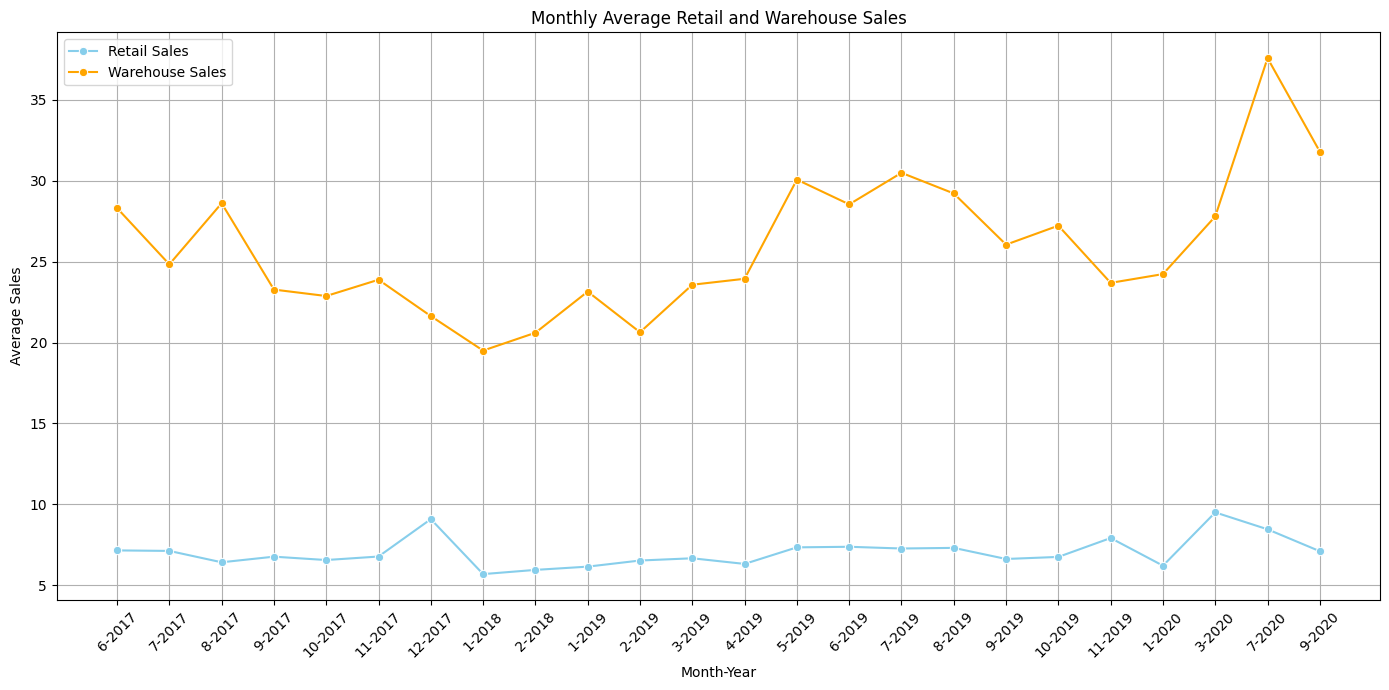

In [49]:
# Monthly average retail sales and warehouse sales by Month-Year'

import seaborn as sns

monthly_avg_sales = df_cleaned.groupby(['YEAR', 'MONTH'])[['RETAIL SALES', 'WAREHOUSE SALES']].mean().reset_index()

monthly_avg_sales['Month-Year'] = monthly_avg_sales['MONTH'].astype(str) + '-' + monthly_avg_sales['YEAR'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_avg_sales, x='Month-Year', y='RETAIL SALES', marker='o', label='Retail Sales', color='skyblue')
sns.lineplot(data=monthly_avg_sales, x='Month-Year', y='WAREHOUSE SALES', marker='o', label='Warehouse Sales', color='orange')

plt.title('Monthly Average Retail and Warehouse Sales')
plt.xlabel('Month-Year')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
# Total sales for each item

total_sales_per_item_type = df_cleaned.groupby('ITEM TYPE')[['RETAIL SALES', 'WAREHOUSE SALES']].sum()
total_sales_per_item_type['TOTAL SALES'] = total_sales_per_item_type['RETAIL SALES'] + total_sales_per_item_type['WAREHOUSE SALES']

total_sales_per_item_type = total_sales_per_item_type.sort_values(by='TOTAL SALES', ascending=False)

print(total_sales_per_item_type)

top_item_type = total_sales_per_item_type.iloc[0]
print(f"The item type that contributes the most to overall sales is: {top_item_type.name}")


              RETAIL SALES  WAREHOUSE SALES  TOTAL SALES
ITEM TYPE                                               
BEER             574220.86       6527995.14   7102216.00
WINE             746526.31       1157428.28   1903954.59
LIQUOR           802706.59         95004.19    897710.78
KEGS                  0.00        118623.00    118623.00
NON-ALCOHOL       34084.39         26159.26     60243.65
STR_SUPPLIES       2740.88             0.00      2740.88
REF                 663.71           298.00       961.71
DUNNAGE               0.00             0.00         0.00
The item type that contributes the most to overall sales is: BEER


Calculated the monthly average sales for each year by aggregating RETAIL SALES and WAREHOUSE SALES. A 'Month-Year' column was created to facilitate better plotting and visualization of monthly trends for both retail and warehouse sales, providing insights into seasonality and monthly sales fluctuations.

Analyzed total sales by item type by summing both retail and warehouse sales across item categories. This analysis revealed that BEER had the highest total sales, followed by WINE and LIQUOR, indicating that alcoholic beverages contribute the most to overall sales.


**Analyse whether there are any seasonal trends in sales data ?**

Yes there are seasonal trends
-By calculating the monthly average sales for each year, the data can reveal fluctuations that suggest seasonality. Certain months consistently lie JULY show higher average sales in 2019 and 2020, particularly around holidays, like BEER, can be linked to seasonality. As it is the Highest selling product

## **Part 4 : Recommendations and Insights**

**Insights :**

1. Warehouse Sales Outperform Retail:  
   The data shows that warehouse sales are more successful than retail sales. They should invest more in digital marketing and advertising to boost the online presence and sales.

2. Strong Performance in 2019/20:  
   The warehouse had a great year in 2019/20. They need to explore customer behavior during that time, especially looking at the impact of new product launches and seasonal trends that may have contributed to this success.

3. High Demand for Beer:  
   Beer is the top-selling product. They should create targeted marketing strategies for beer customers, offering exclusive promotions, discounts, and special collections. It’s also important to manage stock levels effectively to prevent any out-of-stock situations.

5. Monitor Competitor Activity:  
   Keep an eye on competitors’ strategies especially when the sales are less. This will help to stay competitive and identify new opportunities in the market.

**Recommendations:**


1. Expand digital marketing efforts to enhance online visibility and reach a wider audience.
2. Strengthen the e-commerce platform for a smoother and more user-friendly shopping experience.
3. Conduct competitor analysis and follow market trends to prioritize investments effectively.
4. Use customer segmentation to target specific groups with tailored marketing strategies.
5. Incorporate feedback and offer personalized promotions to improve customer engagement.
6. Implement a loyalty program for frequent customers, possibly using a points-based system.
7. Identify causes of retail sales decline and improve the in-store experience, while integrating online and offline channels, like click-and-collect or in-store discounts.
8. Track leads who are aware of the company and send them personalized offers and incentives to encourage their first purchase.


**Technical Recommendations:**
1. Can use Google Data Studio which is free and easy to integrate with Google Analytics and other tools to visualize data.
2. Customer Relationship Management (CRM) Tools for customer engagement, and sales tracking. Also can use zoho Inventory  for managing orders, warehouses,etc.
3. DevOps Implementation:

  GitHUB for version control and managing deployments efficiently.

  Docker: Container platform for creating lightweight, portable applications that can run consistently across various environments.

  Jenkins: Automating software builds, tests, and deployments, perfect for implementing CI/CD pipelines at a low cost.

4. Invest in modern UX/UI design practices to create a seamless shopping experience. Use A/B testing to continuously improve website layout, reducing friction in the customer journey. Prioritize responsive and mobile-first design to cater to the increasing number of mobile shoppers

Hrushikesh Dagwar